## Transfer learning with DenseNet121

- Fine-turn generator. Source: https://keras.io/applications/#fine-tune-inceptionv3-on-a-new-set-of-classes

In [9]:
from keras.applications.densenet import DenseNet121

from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

import numpy as np
from keras.utils import Sequence, to_categorical
from keras.optimizers import SGD

# create the base pre-trained model
base_model = DenseNet121(weights='imagenet',
                         input_shape = (32,32,3),
                         include_top=False,
                        classes=5)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 5 classes
predictions = Dense(5, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# dataset
X = np.load('INSA_data_images/CLEAN_train_RGB_0_10_25.npy')
Y = np.load('INSA_data_images/CLEAN_train_labels_0_10_25.npy')

history = model.fit(x = X, y = Y, epochs=15, batch_size=64, verbose = 1)

Epoch 1/15
163989/163989 [==============================] - 71s 433us/step - loss: 0.5744 - acc: 0.7969
Epoch 2/15
163989/163989 [==============================] - 65s 398us/step - loss: 0.5068 - acc: 0.8210
Epoch 3/15
163989/163989 [==============================] - 67s 409us/step - loss: 0.4976 - acc: 0.8277
Epoch 4/15
163989/163989 [==============================] - 68s 415us/step - loss: 0.4913 - acc: 0.8322
Epoch 5/15
163989/163989 [==============================] - 67s 407us/step - loss: 0.4869 - acc: 0.8362
Epoch 6/15
163989/163989 [==============================] - 67s 409us/step - loss: 0.4840 - acc: 0.8381
Epoch 7/15
163989/163989 [==============================] - 68s 417us/step - loss: 0.4852 - acc: 0.8408
Epoch 8/15
163989/163989 [==============================] - 68s 413us/step - loss: 0.4830 - acc: 0.8430
Epoch 9/15
163989/163989 [==============================] - 67s 411us/step - loss: 0.4824 - acc: 0.8436
Epoch 10/15
163989/163989 [==============================] - 70s

* Visualize performance

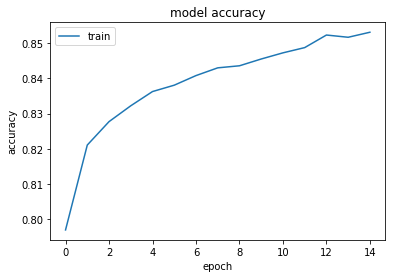

In [11]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

- Evaluate model

In [1]:
X_test = np.load('INSA_data_images/CLEAN_test_RGB_0_10_25.npy')
Y_test = np.load('INSA_data_images/CLEAN_test_labels_0_10_25.npy')

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = model.evaluate(X_test, Y_test, verbose=1)
print(model.metrics_names, " = ", score)

NameError: name 'np' is not defined

- Save model

In [ ]:
model.save_weights("DucHau.h5")
print("Saved model to disk")

- Load model

In [ ]:
# load weights into new model
loaded_model.load_weights("DucHau.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)